# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

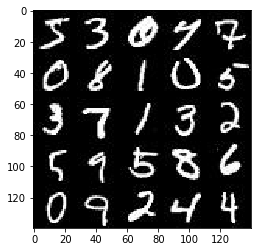

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

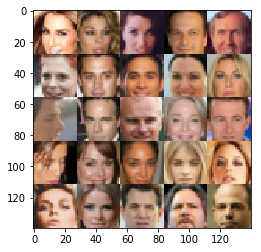

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/rahall4405/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, shape=[None, image_width, image_height, image_channels], name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        # 28x28 input 
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7X7X128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x2, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4X4X256
        x4 = tf.layers.conv2d(relu3, 512, 5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(x2, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        # 2X2X512
        dimensions = relu4.get_shape().as_list()
        
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, dimensions[1]*dimensions[2]*dimensions[3]))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
     # First fully connected layer
        alpha=.1
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x128 now
        
        x4 = tf.layers.conv2d_transpose(x3, 64, 5, strides=1, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        # 28x28x32
        # Output layer
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-0.1)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height,image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    
    
    steps = 0
    print_every = 10
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images*2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z,lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images,lr:learning_rate})


                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z, input_real: batch_images})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 50, input_z, image_channels, data_image_mode)       
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.1024... Generator Loss: 0.2026
Epoch 1/2... Discriminator Loss: 1.0608... Generator Loss: 0.7737
Epoch 1/2... Discriminator Loss: 2.5079... Generator Loss: 0.1515
Epoch 1/2... Discriminator Loss: 1.0261... Generator Loss: 0.9265
Epoch 1/2... Discriminator Loss: 1.4602... Generator Loss: 0.5969
Epoch 1/2... Discriminator Loss: 1.8377... Generator Loss: 0.5622
Epoch 1/2... Discriminator Loss: 1.4363... Generator Loss: 0.7546
Epoch 1/2... Discriminator Loss: 1.7538... Generator Loss: 0.5603
Epoch 1/2... Discriminator Loss: 1.5191... Generator Loss: 0.6564
Epoch 1/2... Discriminator Loss: 1.2781... Generator Loss: 0.7731


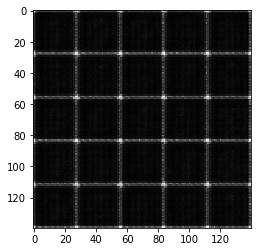

Epoch 1/2... Discriminator Loss: 1.2620... Generator Loss: 0.7996
Epoch 1/2... Discriminator Loss: 1.6075... Generator Loss: 0.6156
Epoch 1/2... Discriminator Loss: 1.6471... Generator Loss: 0.5720
Epoch 1/2... Discriminator Loss: 1.5843... Generator Loss: 0.5769
Epoch 1/2... Discriminator Loss: 1.5375... Generator Loss: 0.6900
Epoch 1/2... Discriminator Loss: 1.5566... Generator Loss: 0.6605
Epoch 1/2... Discriminator Loss: 1.3428... Generator Loss: 0.8065
Epoch 1/2... Discriminator Loss: 1.5230... Generator Loss: 0.6596
Epoch 1/2... Discriminator Loss: 1.4234... Generator Loss: 0.6988
Epoch 1/2... Discriminator Loss: 1.6459... Generator Loss: 0.5845


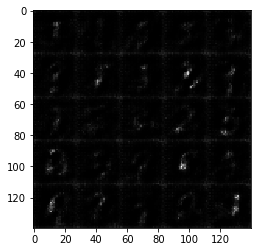

Epoch 1/2... Discriminator Loss: 1.5820... Generator Loss: 0.5893
Epoch 1/2... Discriminator Loss: 1.6650... Generator Loss: 0.5796
Epoch 1/2... Discriminator Loss: 1.5247... Generator Loss: 0.6513
Epoch 1/2... Discriminator Loss: 1.6875... Generator Loss: 0.5824
Epoch 1/2... Discriminator Loss: 1.5021... Generator Loss: 0.6896
Epoch 1/2... Discriminator Loss: 1.5455... Generator Loss: 0.7057
Epoch 1/2... Discriminator Loss: 1.4511... Generator Loss: 0.6881
Epoch 1/2... Discriminator Loss: 1.6759... Generator Loss: 0.5659
Epoch 1/2... Discriminator Loss: 1.4759... Generator Loss: 0.6880
Epoch 1/2... Discriminator Loss: 1.5216... Generator Loss: 0.7115


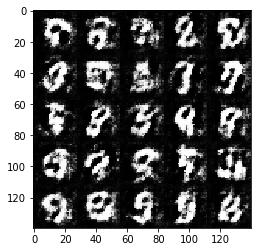

Epoch 1/2... Discriminator Loss: 1.4969... Generator Loss: 0.6632
Epoch 1/2... Discriminator Loss: 1.5359... Generator Loss: 0.6691
Epoch 1/2... Discriminator Loss: 1.4574... Generator Loss: 0.6802
Epoch 1/2... Discriminator Loss: 1.4663... Generator Loss: 0.6707
Epoch 1/2... Discriminator Loss: 1.4517... Generator Loss: 0.7184
Epoch 1/2... Discriminator Loss: 1.3771... Generator Loss: 0.7609
Epoch 1/2... Discriminator Loss: 1.5516... Generator Loss: 0.6382
Epoch 1/2... Discriminator Loss: 1.2971... Generator Loss: 0.7676
Epoch 1/2... Discriminator Loss: 1.3969... Generator Loss: 0.7551
Epoch 1/2... Discriminator Loss: 1.4099... Generator Loss: 0.7643


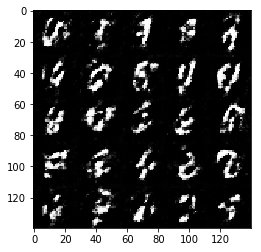

Epoch 1/2... Discriminator Loss: 1.3802... Generator Loss: 0.7428
Epoch 1/2... Discriminator Loss: 1.3973... Generator Loss: 0.7273
Epoch 1/2... Discriminator Loss: 1.4430... Generator Loss: 0.7066
Epoch 1/2... Discriminator Loss: 1.4783... Generator Loss: 0.7597
Epoch 1/2... Discriminator Loss: 1.3086... Generator Loss: 0.7931
Epoch 1/2... Discriminator Loss: 1.4112... Generator Loss: 0.6758
Epoch 1/2... Discriminator Loss: 1.2840... Generator Loss: 0.8213
Epoch 1/2... Discriminator Loss: 1.3614... Generator Loss: 0.7421
Epoch 1/2... Discriminator Loss: 1.3791... Generator Loss: 0.7596
Epoch 1/2... Discriminator Loss: 1.3853... Generator Loss: 0.7461


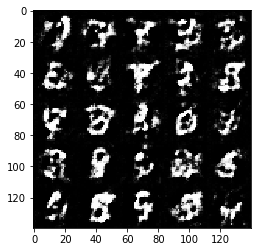

Epoch 1/2... Discriminator Loss: 1.4350... Generator Loss: 0.7150
Epoch 1/2... Discriminator Loss: 1.3050... Generator Loss: 0.7799
Epoch 1/2... Discriminator Loss: 1.2953... Generator Loss: 0.8587
Epoch 1/2... Discriminator Loss: 1.3073... Generator Loss: 0.8221
Epoch 1/2... Discriminator Loss: 1.3338... Generator Loss: 0.7717
Epoch 1/2... Discriminator Loss: 1.3524... Generator Loss: 0.8202
Epoch 1/2... Discriminator Loss: 1.2980... Generator Loss: 0.8527
Epoch 1/2... Discriminator Loss: 1.2935... Generator Loss: 0.7803
Epoch 1/2... Discriminator Loss: 1.2882... Generator Loss: 0.7682
Epoch 1/2... Discriminator Loss: 1.2832... Generator Loss: 0.7800


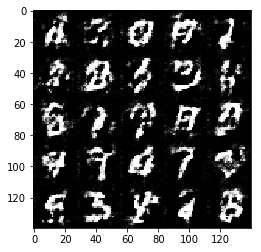

Epoch 1/2... Discriminator Loss: 1.3214... Generator Loss: 0.8047
Epoch 1/2... Discriminator Loss: 1.2814... Generator Loss: 0.7937
Epoch 1/2... Discriminator Loss: 1.2618... Generator Loss: 0.7973
Epoch 1/2... Discriminator Loss: 1.2174... Generator Loss: 0.8849
Epoch 1/2... Discriminator Loss: 1.3041... Generator Loss: 0.8020
Epoch 1/2... Discriminator Loss: 1.2732... Generator Loss: 0.8366
Epoch 1/2... Discriminator Loss: 1.2438... Generator Loss: 0.8172
Epoch 1/2... Discriminator Loss: 1.3769... Generator Loss: 0.7675
Epoch 1/2... Discriminator Loss: 1.3247... Generator Loss: 0.8510
Epoch 1/2... Discriminator Loss: 1.3075... Generator Loss: 0.8284


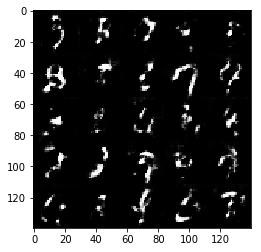

Epoch 1/2... Discriminator Loss: 1.3212... Generator Loss: 0.7620
Epoch 1/2... Discriminator Loss: 1.3168... Generator Loss: 0.8115
Epoch 1/2... Discriminator Loss: 1.1676... Generator Loss: 0.9555
Epoch 1/2... Discriminator Loss: 1.2500... Generator Loss: 0.9275
Epoch 1/2... Discriminator Loss: 1.3103... Generator Loss: 0.7796
Epoch 1/2... Discriminator Loss: 1.3165... Generator Loss: 0.8771
Epoch 1/2... Discriminator Loss: 1.2415... Generator Loss: 0.8157
Epoch 1/2... Discriminator Loss: 1.4323... Generator Loss: 0.6475
Epoch 1/2... Discriminator Loss: 1.2807... Generator Loss: 0.8229
Epoch 1/2... Discriminator Loss: 1.2613... Generator Loss: 0.8031


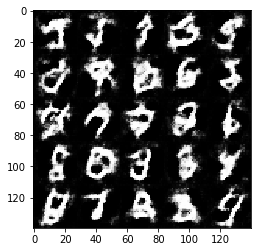

Epoch 1/2... Discriminator Loss: 1.2771... Generator Loss: 0.8528
Epoch 1/2... Discriminator Loss: 1.3639... Generator Loss: 0.7834
Epoch 1/2... Discriminator Loss: 1.3476... Generator Loss: 0.9189
Epoch 1/2... Discriminator Loss: 1.2754... Generator Loss: 0.8181
Epoch 1/2... Discriminator Loss: 1.2821... Generator Loss: 0.8960
Epoch 1/2... Discriminator Loss: 1.4718... Generator Loss: 0.8500
Epoch 1/2... Discriminator Loss: 1.4432... Generator Loss: 0.6723
Epoch 1/2... Discriminator Loss: 1.2301... Generator Loss: 0.8137
Epoch 1/2... Discriminator Loss: 1.3151... Generator Loss: 0.8561
Epoch 1/2... Discriminator Loss: 1.3071... Generator Loss: 0.9139


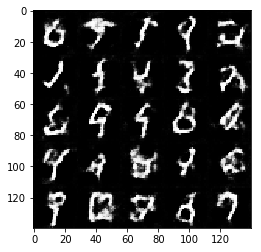

Epoch 1/2... Discriminator Loss: 1.3801... Generator Loss: 0.7475
Epoch 1/2... Discriminator Loss: 1.2925... Generator Loss: 0.8858
Epoch 1/2... Discriminator Loss: 1.2353... Generator Loss: 0.8060
Epoch 2/2... Discriminator Loss: 1.2832... Generator Loss: 0.8468
Epoch 2/2... Discriminator Loss: 1.3144... Generator Loss: 0.7967
Epoch 2/2... Discriminator Loss: 1.2860... Generator Loss: 0.8300
Epoch 2/2... Discriminator Loss: 1.3161... Generator Loss: 0.7645
Epoch 2/2... Discriminator Loss: 1.3882... Generator Loss: 0.7633
Epoch 2/2... Discriminator Loss: 1.3467... Generator Loss: 0.7670
Epoch 2/2... Discriminator Loss: 1.2336... Generator Loss: 0.8046


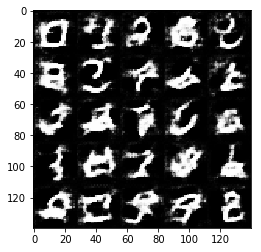

Epoch 2/2... Discriminator Loss: 1.2713... Generator Loss: 0.8650
Epoch 2/2... Discriminator Loss: 1.2277... Generator Loss: 0.8729
Epoch 2/2... Discriminator Loss: 1.3005... Generator Loss: 0.7417
Epoch 2/2... Discriminator Loss: 1.3891... Generator Loss: 0.6847
Epoch 2/2... Discriminator Loss: 1.0733... Generator Loss: 1.0074
Epoch 2/2... Discriminator Loss: 1.3596... Generator Loss: 0.8754
Epoch 2/2... Discriminator Loss: 1.3281... Generator Loss: 0.8215
Epoch 2/2... Discriminator Loss: 1.3250... Generator Loss: 0.7546
Epoch 2/2... Discriminator Loss: 1.3630... Generator Loss: 0.8191
Epoch 2/2... Discriminator Loss: 1.3066... Generator Loss: 0.8893


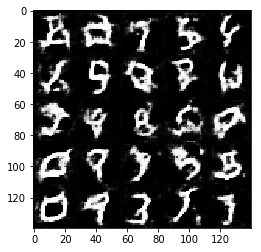

Epoch 2/2... Discriminator Loss: 1.1507... Generator Loss: 0.9677
Epoch 2/2... Discriminator Loss: 1.2635... Generator Loss: 0.8955
Epoch 2/2... Discriminator Loss: 1.3576... Generator Loss: 0.7989
Epoch 2/2... Discriminator Loss: 1.3414... Generator Loss: 0.7429
Epoch 2/2... Discriminator Loss: 1.2993... Generator Loss: 0.7241
Epoch 2/2... Discriminator Loss: 1.3233... Generator Loss: 0.9168
Epoch 2/2... Discriminator Loss: 1.2800... Generator Loss: 0.8328
Epoch 2/2... Discriminator Loss: 1.3124... Generator Loss: 0.7827
Epoch 2/2... Discriminator Loss: 1.2968... Generator Loss: 0.8434
Epoch 2/2... Discriminator Loss: 1.3153... Generator Loss: 0.7533


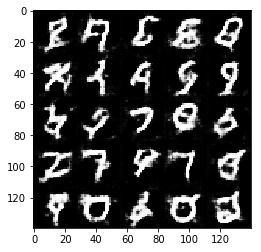

Epoch 2/2... Discriminator Loss: 1.2169... Generator Loss: 1.0938
Epoch 2/2... Discriminator Loss: 1.2827... Generator Loss: 0.8381
Epoch 2/2... Discriminator Loss: 1.3371... Generator Loss: 0.8245
Epoch 2/2... Discriminator Loss: 1.2627... Generator Loss: 0.8515
Epoch 2/2... Discriminator Loss: 1.2602... Generator Loss: 0.8642
Epoch 2/2... Discriminator Loss: 1.2141... Generator Loss: 0.9973
Epoch 2/2... Discriminator Loss: 1.3521... Generator Loss: 0.8361
Epoch 2/2... Discriminator Loss: 1.2326... Generator Loss: 0.8611
Epoch 2/2... Discriminator Loss: 1.3650... Generator Loss: 0.7905
Epoch 2/2... Discriminator Loss: 1.3657... Generator Loss: 0.7153


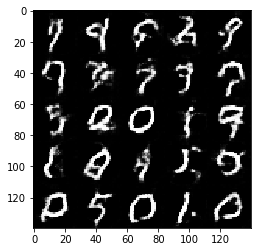

Epoch 2/2... Discriminator Loss: 1.3103... Generator Loss: 0.8279
Epoch 2/2... Discriminator Loss: 1.4144... Generator Loss: 0.7186
Epoch 2/2... Discriminator Loss: 1.4069... Generator Loss: 0.6667
Epoch 2/2... Discriminator Loss: 1.2597... Generator Loss: 0.8096
Epoch 2/2... Discriminator Loss: 1.4761... Generator Loss: 0.6644
Epoch 2/2... Discriminator Loss: 1.3660... Generator Loss: 0.9252
Epoch 2/2... Discriminator Loss: 1.2828... Generator Loss: 0.8928
Epoch 2/2... Discriminator Loss: 1.2396... Generator Loss: 0.9370
Epoch 2/2... Discriminator Loss: 1.3153... Generator Loss: 0.8853
Epoch 2/2... Discriminator Loss: 1.3464... Generator Loss: 0.7683


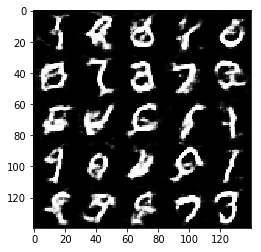

Epoch 2/2... Discriminator Loss: 1.2622... Generator Loss: 0.9224
Epoch 2/2... Discriminator Loss: 1.4085... Generator Loss: 0.6977
Epoch 2/2... Discriminator Loss: 1.4051... Generator Loss: 0.7432
Epoch 2/2... Discriminator Loss: 1.2478... Generator Loss: 0.8924
Epoch 2/2... Discriminator Loss: 1.3140... Generator Loss: 0.8354
Epoch 2/2... Discriminator Loss: 1.3023... Generator Loss: 0.7778
Epoch 2/2... Discriminator Loss: 1.2233... Generator Loss: 0.9101
Epoch 2/2... Discriminator Loss: 1.3021... Generator Loss: 0.8031
Epoch 2/2... Discriminator Loss: 1.3250... Generator Loss: 0.9080
Epoch 2/2... Discriminator Loss: 1.3519... Generator Loss: 0.7832


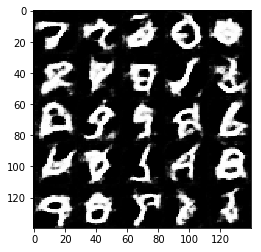

Epoch 2/2... Discriminator Loss: 1.3942... Generator Loss: 0.7558


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 3.3293... Generator Loss: 0.1002
Epoch 1/1... Discriminator Loss: 1.6095... Generator Loss: 0.6298
Epoch 1/1... Discriminator Loss: 2.0365... Generator Loss: 0.4519
Epoch 1/1... Discriminator Loss: 1.6845... Generator Loss: 0.8000
Epoch 1/1... Discriminator Loss: 1.3713... Generator Loss: 1.0655
Epoch 1/1... Discriminator Loss: 1.3013... Generator Loss: 0.9813
Epoch 1/1... Discriminator Loss: 1.2023... Generator Loss: 1.1395
Epoch 1/1... Discriminator Loss: 1.5917... Generator Loss: 0.7542
Epoch 1/1... Discriminator Loss: 1.6908... Generator Loss: 0.6524
Epoch 1/1... Discriminator Loss: 1.6538... Generator Loss: 0.7131


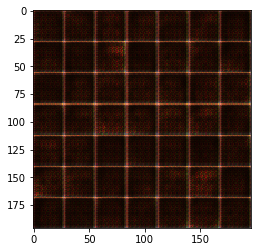

Epoch 1/1... Discriminator Loss: 1.2568... Generator Loss: 0.8980
Epoch 1/1... Discriminator Loss: 1.0951... Generator Loss: 1.2184
Epoch 1/1... Discriminator Loss: 1.7576... Generator Loss: 0.7467
Epoch 1/1... Discriminator Loss: 1.3073... Generator Loss: 0.9589
Epoch 1/1... Discriminator Loss: 1.2599... Generator Loss: 1.2945
Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 0.8250
Epoch 1/1... Discriminator Loss: 1.7312... Generator Loss: 0.7724
Epoch 1/1... Discriminator Loss: 0.9336... Generator Loss: 1.2671
Epoch 1/1... Discriminator Loss: 1.5567... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 1.2657... Generator Loss: 0.9611


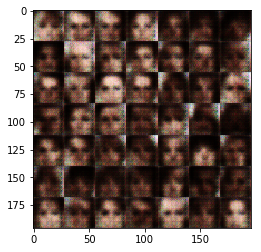

Epoch 1/1... Discriminator Loss: 0.9982... Generator Loss: 1.4726
Epoch 1/1... Discriminator Loss: 1.0096... Generator Loss: 1.7394
Epoch 1/1... Discriminator Loss: 0.9593... Generator Loss: 1.2848
Epoch 1/1... Discriminator Loss: 1.1155... Generator Loss: 2.1588
Epoch 1/1... Discriminator Loss: 0.8800... Generator Loss: 1.1438
Epoch 1/1... Discriminator Loss: 0.9504... Generator Loss: 1.1947
Epoch 1/1... Discriminator Loss: 0.9483... Generator Loss: 1.3494
Epoch 1/1... Discriminator Loss: 1.0977... Generator Loss: 0.8621
Epoch 1/1... Discriminator Loss: 0.7599... Generator Loss: 2.0370
Epoch 1/1... Discriminator Loss: 1.2991... Generator Loss: 0.5645


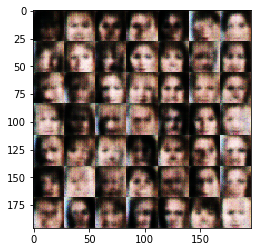

Epoch 1/1... Discriminator Loss: 1.1119... Generator Loss: 0.9356
Epoch 1/1... Discriminator Loss: 0.9276... Generator Loss: 1.6894
Epoch 1/1... Discriminator Loss: 0.9626... Generator Loss: 1.8162
Epoch 1/1... Discriminator Loss: 0.6112... Generator Loss: 3.0385
Epoch 1/1... Discriminator Loss: 1.1497... Generator Loss: 2.4835
Epoch 1/1... Discriminator Loss: 0.5414... Generator Loss: 2.2084
Epoch 1/1... Discriminator Loss: 0.6419... Generator Loss: 2.6404
Epoch 1/1... Discriminator Loss: 0.7926... Generator Loss: 1.3599
Epoch 1/1... Discriminator Loss: 0.7112... Generator Loss: 3.6605
Epoch 1/1... Discriminator Loss: 0.9923... Generator Loss: 0.8524


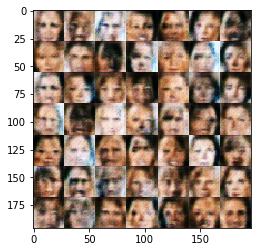

Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.5285
Epoch 1/1... Discriminator Loss: 1.1857... Generator Loss: 1.1865
Epoch 1/1... Discriminator Loss: 1.4275... Generator Loss: 0.5050
Epoch 1/1... Discriminator Loss: 0.8366... Generator Loss: 1.5734
Epoch 1/1... Discriminator Loss: 0.6920... Generator Loss: 1.5130
Epoch 1/1... Discriminator Loss: 0.6077... Generator Loss: 1.8211
Epoch 1/1... Discriminator Loss: 1.6288... Generator Loss: 0.3757
Epoch 1/1... Discriminator Loss: 0.6391... Generator Loss: 1.5973
Epoch 1/1... Discriminator Loss: 1.8765... Generator Loss: 0.2977
Epoch 1/1... Discriminator Loss: 1.0409... Generator Loss: 4.7498


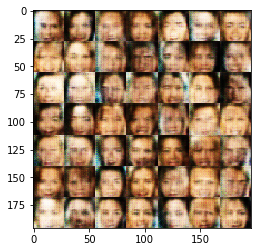

Epoch 1/1... Discriminator Loss: 0.6925... Generator Loss: 1.8861
Epoch 1/1... Discriminator Loss: 0.6568... Generator Loss: 2.1376
Epoch 1/1... Discriminator Loss: 0.8252... Generator Loss: 1.8892
Epoch 1/1... Discriminator Loss: 0.7370... Generator Loss: 2.3027
Epoch 1/1... Discriminator Loss: 0.9184... Generator Loss: 0.9756
Epoch 1/1... Discriminator Loss: 0.9159... Generator Loss: 0.9497
Epoch 1/1... Discriminator Loss: 1.9416... Generator Loss: 0.3224
Epoch 1/1... Discriminator Loss: 0.9219... Generator Loss: 2.6252
Epoch 1/1... Discriminator Loss: 0.8037... Generator Loss: 1.4299
Epoch 1/1... Discriminator Loss: 0.7469... Generator Loss: 2.0898


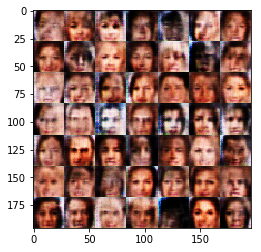

Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 1.0753
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.6357
Epoch 1/1... Discriminator Loss: 1.0647... Generator Loss: 1.1405
Epoch 1/1... Discriminator Loss: 1.2606... Generator Loss: 0.7274
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.5210
Epoch 1/1... Discriminator Loss: 1.9566... Generator Loss: 0.2853
Epoch 1/1... Discriminator Loss: 1.2845... Generator Loss: 0.8091
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.9536
Epoch 1/1... Discriminator Loss: 1.1716... Generator Loss: 1.1063
Epoch 1/1... Discriminator Loss: 1.2145... Generator Loss: 0.8291


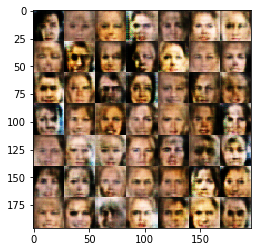

Epoch 1/1... Discriminator Loss: 1.1820... Generator Loss: 0.9747
Epoch 1/1... Discriminator Loss: 0.9690... Generator Loss: 1.2839
Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 0.7371
Epoch 1/1... Discriminator Loss: 1.0098... Generator Loss: 1.1027
Epoch 1/1... Discriminator Loss: 1.1655... Generator Loss: 1.0081
Epoch 1/1... Discriminator Loss: 1.3751... Generator Loss: 0.5479
Epoch 1/1... Discriminator Loss: 1.0450... Generator Loss: 0.9299
Epoch 1/1... Discriminator Loss: 1.1697... Generator Loss: 0.9852
Epoch 1/1... Discriminator Loss: 1.1675... Generator Loss: 1.1360
Epoch 1/1... Discriminator Loss: 1.2449... Generator Loss: 1.0707


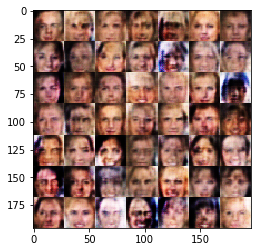

Epoch 1/1... Discriminator Loss: 1.1053... Generator Loss: 0.7760
Epoch 1/1... Discriminator Loss: 1.2389... Generator Loss: 1.0433
Epoch 1/1... Discriminator Loss: 1.4456... Generator Loss: 0.4772
Epoch 1/1... Discriminator Loss: 1.1920... Generator Loss: 1.0225
Epoch 1/1... Discriminator Loss: 1.1774... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.3295... Generator Loss: 0.6407
Epoch 1/1... Discriminator Loss: 1.1292... Generator Loss: 1.5562
Epoch 1/1... Discriminator Loss: 1.0305... Generator Loss: 0.9847
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 1.2492
Epoch 1/1... Discriminator Loss: 1.6638... Generator Loss: 0.4099


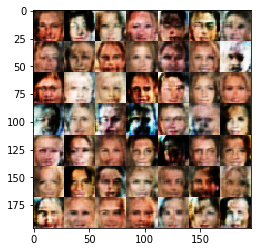

Epoch 1/1... Discriminator Loss: 1.2479... Generator Loss: 0.6219
Epoch 1/1... Discriminator Loss: 1.2502... Generator Loss: 1.2630
Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 0.9524
Epoch 1/1... Discriminator Loss: 1.3115... Generator Loss: 0.5868
Epoch 1/1... Discriminator Loss: 1.1794... Generator Loss: 0.8897
Epoch 1/1... Discriminator Loss: 1.2560... Generator Loss: 0.6210
Epoch 1/1... Discriminator Loss: 1.3969... Generator Loss: 0.5281
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 1.7620
Epoch 1/1... Discriminator Loss: 1.0040... Generator Loss: 1.5494
Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 1.3247


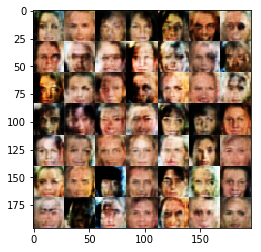

Epoch 1/1... Discriminator Loss: 1.8275... Generator Loss: 1.3302
Epoch 1/1... Discriminator Loss: 1.2695... Generator Loss: 0.9158
Epoch 1/1... Discriminator Loss: 1.5479... Generator Loss: 0.4410
Epoch 1/1... Discriminator Loss: 1.2228... Generator Loss: 1.3011
Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 0.9240
Epoch 1/1... Discriminator Loss: 1.0884... Generator Loss: 0.9862
Epoch 1/1... Discriminator Loss: 1.8496... Generator Loss: 0.2799
Epoch 1/1... Discriminator Loss: 1.6445... Generator Loss: 0.3988
Epoch 1/1... Discriminator Loss: 1.4628... Generator Loss: 0.6246
Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 0.6901


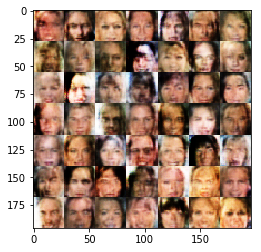

Epoch 1/1... Discriminator Loss: 1.2962... Generator Loss: 1.0480
Epoch 1/1... Discriminator Loss: 1.0638... Generator Loss: 1.1110
Epoch 1/1... Discriminator Loss: 1.5045... Generator Loss: 0.5073
Epoch 1/1... Discriminator Loss: 0.9351... Generator Loss: 1.4818
Epoch 1/1... Discriminator Loss: 1.1955... Generator Loss: 0.7676
Epoch 1/1... Discriminator Loss: 1.1546... Generator Loss: 1.0830
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 1.5025
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 1.1498


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = .0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.